# MT Object

MT transfer functions come in all kinds of formats and flavors.  The goal of `MT` is to centralize and standardize an MT transfer function with common metadata and accessibility to the data.  `MT` inherits [`mt_metadata.transfer_function.core.TF`](https://mt-metadata.readthedocs.io/en/latest/source/tf_structure.html) which has the ability to read/write in various file types. If there is a file type that is not supported yet raise an [issue in mt-metadata](https://github.com/kujaku11/mt_metadata/issues). 

| Format | Description | Extension | Read | Write |
|--------|-------------|-----------|------|-------|
| EDI | Common [SEG format](https://library.seg.org/doi/abs/10.1190/1.1892244) | .edi | yes | yes |
| EMTF XML | Anna Kelbert's [XML Format](https://library.seg.org/doi/10.1190/geo2018-0679.1) for archiving at [IRIS](https://eos.org/science-updates/taking-magnetotelluric-data-out-of-the-drawer) | .xml | yes | yes |
| Z-Files | Output from Gary Egberts processing code | .zmm, .zss, .zrr | yes | yes |
| J-Files | Alan Jones' format and output of Alan Chave's BIRRP code | .j | yes | no |
| Zonge AVG | Zonge International processing code output | .avg | yes | no |

The `MT` has a couple of important attributes and method that are described below as we progress through an example file.  Here we will look at an EMTF XML because this format has the most comprehensive metadata so far.


In [1]:
from mtpy import MT
from mt_metadata import TF_XML

2023-04-21 11:50:49,395 [line 141] mth5.setup_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mth5\logs\mth5_debug.log


In [2]:
mt_object = MT(TF_XML)
mt_object.read_tf_file()

## TF Metadata

Important in describing the transfer function are metadata attributes, namely the location, what survey the station was collected in, timing, and how the data were processed.  These are contained in logical metadata objects. For further reading on metadata objects see [MT-metadata](https://mt-metadata.readthedocs.io/en/latest/source/tf_structure.html)

 - `MT.survey_metadata`: describes the general survey details that this transfer function belongs to. 
 - `MT.station_metadata`: describes the station location, timing, runs processed, processing scheme.
   - `MT.station_metadata.transfer_function`: describes how the data were processed.
   - `MT.station_metadata.runs`: provides details on the runs processed, timing, sample rate, channels recorded, data logger details.
     - `MT.station_metadata.runs[run_id].channels`: describes channel metadata including timing, sensors, location.

### Survey Metadata

Survey metadata provides information about the survey ID, geographic locations, who aquired the data, is there a DOI associated with the data or publications, how the data can be used, licenses, and general information about the overall survey.

In [3]:
mt_object.survey_metadata

{
    "survey": {
        "acquired_by.author": "National Geoelectromagnetic Facility",
        "citation_dataset.doi": "doi:10.17611/DP/EMTF/USMTARRAY/SOUTH",
        "citation_dataset.title": "USMTArray South Magnetotelluric Transfer Functions",
        "citation_dataset.year": "2020-2023",
        "citation_journal.doi": null,
        "comments": "The USMTArray-CONUS South campaign was carried out through a cooperative agreement between\nthe U.S. Geological Survey (USGS) and Oregon State University (OSU). A subset of 40 stations\nin the SW US were funded through NASA grant 80NSSC19K0232.\nLand permitting, data acquisition, quality control and field processing were\ncarried out by Green Geophysics with project management and instrument/engineering\nsupport from OSU and Chaytus Engineering, respectively.\nProgram oversight, definitive data processing and data archiving were provided\nby the USGS Geomagnetism Program and the Geology, Geophysics and Geochemistry Science Centers.\nWe tha

### Station Metadata

Station metadata is the most important to describe the transfer function, it provides ID, location, timing and then specifics on how the data were processed, run metadata, and channel metadata.

In [4]:
mt_object.station_metadata

{
    "station": {
        "acquired_by.author": "National Geoelectromagnetic Facility",
        "channels_recorded": [
            "ex",
            "ey",
            "hx",
            "hy",
            "hz"
        ],
        "data_type": "mt",
        "fdsn.id": "USMTArray.NMX20.2020",
        "geographic_name": "Nations Draw, NM, USA",
        "id": "NMX20",
        "location.datum": "WGS84",
        "location.declination.epoch": "2020.0",
        "location.declination.model": "WMM",
        "location.declination.value": 9.09,
        "location.elevation": 1940.05,
        "location.latitude": 34.470528,
        "location.longitude": -108.712288,
        "orientation.angle_to_geographic_north": 0.0,
        "orientation.method": null,
        "orientation.reference_frame": "geographic",
        "provenance.creation_time": "2021-03-17T14:47:44+00:00",
        "provenance.software.author": null,
        "provenance.software.name": "EMTF File Conversion Utilities 4.0",
        "proven

#### Run Metadata

Run metadata is located in `MT.station_metadata.runs` which is a list-dictionary object that contains the runs used for processing. 

In [5]:
mt_object.station_metadata.runs

OrderedDict([('NMX20a', {
    "run": {
        "channels_recorded_auxiliary": [],
        "channels_recorded_electric": [
            "ex",
            "ey"
        ],
        "channels_recorded_magnetic": [
            "hx",
            "hy",
            "hz"
        ],
        "data_logger.firmware.author": null,
        "data_logger.firmware.name": null,
        "data_logger.firmware.version": null,
        "data_logger.id": "2612-01",
        "data_logger.manufacturer": "Barry Narod",
        "data_logger.timing_system.drift": 0.0,
        "data_logger.timing_system.type": "GPS",
        "data_logger.timing_system.uncertainty": 0.0,
        "data_logger.type": "NIMS",
        "data_type": "BBMT",
        "id": "NMX20a",
        "sample_rate": 1.0,
        "time_period.end": "2020-09-20T19:29:28+00:00",
        "time_period.start": "2020-09-20T19:03:06+00:00"
    }
}), ('NMX20b', {
    "run": {
        "channels_recorded_auxiliary": [],
        "channels_recorded_electric": [
      

To access a single run you can use either the index of the run or the `run.id`

In [6]:
mt_object.station_metadata.runs[0]

{
    "run": {
        "channels_recorded_auxiliary": [],
        "channels_recorded_electric": [
            "ex",
            "ey"
        ],
        "channels_recorded_magnetic": [
            "hx",
            "hy",
            "hz"
        ],
        "data_logger.firmware.author": null,
        "data_logger.firmware.name": null,
        "data_logger.firmware.version": null,
        "data_logger.id": "2612-01",
        "data_logger.manufacturer": "Barry Narod",
        "data_logger.timing_system.drift": 0.0,
        "data_logger.timing_system.type": "GPS",
        "data_logger.timing_system.uncertainty": 0.0,
        "data_logger.type": "NIMS",
        "data_type": "BBMT",
        "id": "NMX20a",
        "sample_rate": 1.0,
        "time_period.end": "2020-09-20T19:29:28+00:00",
        "time_period.start": "2020-09-20T19:03:06+00:00"
    }
}

In [7]:
mt_object.station_metadata.runs["NMX20b"]

{
    "run": {
        "channels_recorded_auxiliary": [],
        "channels_recorded_electric": [
            "ex",
            "ey"
        ],
        "channels_recorded_magnetic": [
            "hx",
            "hy",
            "hz"
        ],
        "data_logger.firmware.author": null,
        "data_logger.firmware.name": null,
        "data_logger.firmware.version": null,
        "data_logger.id": "2612-01",
        "data_logger.manufacturer": "Barry Narod",
        "data_logger.timing_system.drift": 0.0,
        "data_logger.timing_system.type": "GPS",
        "data_logger.timing_system.uncertainty": 0.0,
        "data_logger.type": "NIMS",
        "data_type": "BBMT",
        "id": "NMX20b",
        "sample_rate": 1.0,
        "time_period.end": "2020-10-07T20:28:00+00:00",
        "time_period.start": "2020-09-20T20:12:29+00:00"
    }
}

#### Channel Metadata

Channel metadata is important because it describes orientation, location, sensors of each channel.  These are accessed through the run. Similar to the runs direct access can be through the index or component name.

In [9]:
mt_object.station_metadata.runs[0].channels[0]

{
    "magnetic": {
        "channel_number": 0,
        "component": "hx",
        "data_quality.rating.value": 0,
        "filter.applied": [
            false
        ],
        "filter.name": [],
        "location.elevation": 0.0,
        "location.latitude": 0.0,
        "location.longitude": 0.0,
        "location.x": 0.0,
        "location.y": 0.0,
        "location.z": 0.0,
        "measurement_azimuth": 9.1,
        "measurement_tilt": 0.0,
        "sample_rate": 0.0,
        "sensor.id": "2509-23",
        "sensor.manufacturer": "Barry Narod",
        "sensor.name": "NIMS",
        "sensor.type": null,
        "time_period.end": "1980-01-01T00:00:00+00:00",
        "time_period.start": "1980-01-01T00:00:00+00:00",
        "translated_azimuth": 9.1,
        "type": "magnetic",
        "units": null
    }
}

In [10]:
mt_object.station_metadata.runs[0].channels["hy"]

{
    "magnetic": {
        "channel_number": 0,
        "component": "hy",
        "data_quality.rating.value": 0,
        "filter.applied": [
            false
        ],
        "filter.name": [],
        "location.elevation": 0.0,
        "location.latitude": 0.0,
        "location.longitude": 0.0,
        "location.x": 0.0,
        "location.y": 0.0,
        "location.z": 0.0,
        "measurement_azimuth": 99.1,
        "measurement_tilt": 0.0,
        "sample_rate": 0.0,
        "sensor.id": "2509-23",
        "sensor.manufacturer": "Barry Narod",
        "sensor.name": "NIMS",
        "sensor.type": null,
        "time_period.end": "1980-01-01T00:00:00+00:00",
        "time_period.start": "1980-01-01T00:00:00+00:00",
        "translated_azimuth": 99.1,
        "type": "magnetic",
        "units": null
    }
}

Or you can access the channel metadata through a convenience attribute

In [21]:
mt_object.ex_metadata

{
    "electric": {
        "channel_number": 0,
        "component": "ex",
        "data_quality.rating.value": 0,
        "dipole_length": 100.0,
        "filter.applied": [
            false
        ],
        "filter.name": [],
        "measurement_azimuth": 9.1,
        "measurement_tilt": 0.0,
        "negative.elevation": 0.0,
        "negative.id": "40201037",
        "negative.latitude": 0.0,
        "negative.longitude": 0.0,
        "negative.manufacturer": null,
        "negative.type": "Pb-PbCl2 kaolin gel Petiau 2 chamber type",
        "negative.x": -50.0,
        "negative.y": 0.0,
        "negative.z": 0.0,
        "positive.elevation": 0.0,
        "positive.id": "40201038",
        "positive.latitude": 0.0,
        "positive.longitude": 0.0,
        "positive.manufacturer": null,
        "positive.type": "Pb-PbCl2 kaolin gel Petiau 2 chamber type",
        "positive.x2": 50.0,
        "positive.y2": 0.0,
        "positive.z2": 0.0,
        "sample_rate": 0.0,
       

### Metadata Summary

Metadata is important to keep track of and can be cumbersome, but helps future users of your data to actually use your data.  There are a lot of fields here but the most important are ID, location, and timing.

 - mt.survey_metadata.id
 - mt.station_metadata.id
 - mt.station_metadata.location.longitude
 - mt.station_metadata.location.latitude
 - mt.station_metadata.location.elevation
 - mt.station_metadata.time_period.start
 - mt.station_metadata.time_period.end
 - mt.station_metadata.transfer_function.processing.parameters
 - mt.station_metadata.runs[0].channels[component].measurement_azimuth
 - mt.station_metadata.runs[0].channels[component].measurement_tilt
 - mt.station_metadata.runs[0].channels[component].translated_azimuth
 - mt.station_metadata.runs[0].channels[component].translated_tilt

## Data

The most interesting part about a transfer function is the data.  This describes how the Earth response to inducing magnetic fields.  Under the hood an MT object stores a generic transfer function that has input channels (sources) and output channels (reponses) as an [xarray](https://docs.xarray.dev/en/stable/index.html).  

The benefit of using xarray is that it has tools for combining various statistical estimates and naturally indexes across a common index.  In this case we can index along period for each of the statistical estimates (transfer function, errors, and covariances).  The `mt._transfer_function` object is a `xarray.Dataset` and each statistical estimate is an `xarray.DataArray`. 

#### Attributes

The other benefit is that attributes can be store directly alongside the arrays for a self describing object. Here we have picked the most important attributes from the metadata to describe the transfer function.  These are propogated with each statistical estimate so anytime you retreive `impedance` or `tipper` the attributes are in the xarray. 

<div class="alert alert-block alert-info">
    <b>Note:</b> You'll see below that input channels and output channels have the same components, that's because in order to contain the full transfer function and covariances we need a symmetric matrix. Those components that don't have data are filled with NaNs, which is find for transfer functions because they are relatively small and not memory intensive.
</div>

### Generic Transfer Function

In [11]:
mt_object._transfer_function

<xarray.Dataset>
Dimensions:                        (output: 5, input: 5, period: 33)
Coordinates:
  * output                         (output) <U2 'ex' 'ey' 'hx' 'hy' 'hz'
  * input                          (input) <U2 'ex' 'ey' 'hx' 'hy' 'hz'
  * period                         (period) float64 4.655 5.818 ... 2.913e+04
Data variables:
    transfer_function              (period, output, input) complex128 (nan+na...
    transfer_function_error        (period, output, input) float64 nan ... nan
    transfer_function_model_error  (period, output, input) float64 nan ... nan
    inverse_signal_power           (period, output, input) complex128 (nan+na...
    residual_covariance            (period, output, input) complex128 (0.0012...
Attributes: (12/14)
    survey:             CONUS South
    project:            USMTArray
    id:                 NMX20
    name:               Nations Draw, NM, USA
    latitude:           34.470528
    longitude:          -108.712288
    ...                 ...
    datum:              WGS84
    acquired_by:        National Geoelectromagnetic Facility
    start:              2020-09-20T19:03:06+00:00
    end:                2020-10-07T20:28:00+00:00
    runs_processed:     ['NMX20a', 'NMX20b']
    coordinate_system:  geographic

### Errors and Covariances
The generic transfer function xarray also contains the covariances (if provided) and errors of the measured data and also has a place for model errors.  

**Note**: If the tranfer function contains `inverse_signal_power` and `residual_covariance` then the `transfer_function_error` is estimated from these values, otherwise the error from the data file is used.

In [13]:
mt_object._transfer_function.data_vars

Data variables:
    transfer_function              (period, output, input) complex128 (nan+na...
    transfer_function_error        (period, output, input) float64 nan ... nan
    transfer_function_model_error  (period, output, input) float64 nan ... nan
    inverse_signal_power           (period, output, input) complex128 (nan+na...
    residual_covariance            (period, output, input) complex128 (0.0012...

### MTpy.core.transfer_function.Base

Each of the transfer function estimates are represented by a base class called `mtpy.core.tranfer_function.Base` object which has methods like:

 - `inverse` returns the inverse of the transfer function
 - `rotate` rotates the transfer function positive clockwise
 - `interpolate` interpolates onto a different period index
 - `to_xarray` returns an `xarray.DataArray`
 - `from_xarray` ingests an `xarray.DataArray`
 - `to_dataframe` returns a `pandas.DataFrame` representation of the transfer function indexed by period.
 - `from_dataframe` ingests a `pandas.DataFrame`
 - `copy` return a copy of the transfer function object
 - contains validation methods for inputs
 
It also has attributes:

 - `period` period array
 - `frequency` 1/period array
 - `comps` components in the transfer function as input channels and output channels
 - `n_periods` number of periods
 

### Impedance

The impedance $\mathbf{\hat{Z}}$ describes how the Earth electrically responds to horizontal magnetic fields is formed from this generic transfer function.

$\mathbf{\vec{E}}(\omega) = \mathbf{\hat{Z}}(\omega) \mathbf{\vec{H}}(\omega)$

To $\mathbf{\hat{Z}}$ is built from the generic transfer function using the horizontal components of the input and output channels.  There are two ways to access the impedance from the `MT` object 

 - `mt.impedance` will return an xarray of the impedance
 - `mt.impedance_error` will return the errors in the impedance measurement
 - `mt.impedance_model_error` will return model errors for the impedance
 - `mt.Z` will return a `mtpy.core.transfer_function.Z` object which has methods for accessing impedance tensor attributes, which contains the errors. 
 
If you are not sure the transfer function has impedance you can use the method:


In [14]:
mt_object.has_impedance()

True

#### MT.impedance

This is an xarray of the impedance and is computed from the generic transfer function using the horizontal components of the input and output channels.  

In [15]:
mt_object.impedance

<xarray.DataArray 'impedance' (period: 33, output: 2, input: 2)>
array([[[-1.160949e-01-0.2708645j ,  3.143284e+00+1.101737j  ],
        [-2.470717e+00-0.7784633j , -1.057851e-01+0.1022045j ]],

       [[-1.051846e-01-0.1912665j ,  3.169108e+00+1.007867j  ],
        [-2.459892e+00-0.8541335j , -1.325974e-01+0.1473665j ]],

       [[-1.289586e-02-0.1937956j ,  3.064653e+00+1.063899j  ],
        [-2.446347e+00-0.8661013j , -1.222841e-01+0.1580956j ]],

       [[-8.208073e-02-0.3117874j ,  3.042922e+00+1.006518j  ],
        [-2.310078e+00-0.8732821j , -1.620193e-01+0.2110874j ]],

       [[ 3.353187e-02-0.2855585j ,  2.875270e+00+1.083887j  ],
        [-2.135730e+00-0.8666129j , -1.881319e-01+0.2420585j ]],

       [[ 1.014077e-01-0.2989493j ,  2.719818e+00+1.103022j  ],
        [-2.073182e+00-0.8841784j , -3.048077e-01+0.2344493j ]],

       [[ 2.441069e-01-0.2828671j ,  2.493647e+00+1.179619j  ],
        [-1.956353e+00-1.022081j  , -3.447069e-01+0.1793671j ]],
...
       [[ 3.475757e-02+0.0352555j ,  1.770043e-01+0.2258684j ],
        [-1.343957e-01-0.1432316j , -4.149757e-02-0.05223549j]],

       [[ 2.719606e-02+0.03381913j,  1.438796e-01+0.1859595j ],
        [-1.121204e-01-0.1246405j , -3.594606e-02-0.04361913j]],

       [[ 2.161943e-02+0.02911898j,  1.137554e-01+0.150974j  ],
        [-8.744459e-02-0.103626j  , -2.562943e-02-0.03531898j]],

       [[ 1.514583e-02+0.02224749j,  8.349043e-02+0.1184608j ],
        [-6.363958e-02-0.08284923j, -2.077583e-02-0.02673749j]],

       [[ 9.760046e-03+0.01694262j,  5.923743e-02+0.08950258j],
        [-4.535258e-02-0.06544742j, -1.464005e-02-0.02036262j]],

       [[ 1.027061e-02+0.01265869j,  4.057636e-02+0.0674322j ],
        [-3.114365e-02-0.0496578j , -1.030061e-02-0.01919869j]],

       [[ 4.834623e-03+0.00983358j,  2.643963e-02+0.05098311j],
        [-2.203037e-02-0.03744689j, -2.953623e-03-0.01293358j]]])
Coordinates:
  * output   (output) <U2 'ex' 'ey'
  * input    (input) <U2 'hx' 'hy'
  * period   (period) float64 4.655 5.818 7.314 ... 1.872e+04 2.913e+04
Attributes:
    survey:             CONUS South
    project:            USMTArray
    id:                 NMX20
    name:               Nations Draw, NM, USA
    latitude:           34.470528
    longitude:          -108.712288
    elevation:          1940.05
    declination:        9.09
    datum:              WGS84
    acquired_by:        National Geoelectromagnetic Facility
    start:              2020-09-20T19:03:06+00:00
    end:                2020-10-07T20:28:00+00:00
    runs_processed:     ['NMX20a', 'NMX20b']
    coordinate_system:  geographic

### MT.Z

The `Z` object is central to most actions in `mtpy` and has various attributes that are important to analyzing and visualizing the impedance tensor.  Of these are:

 - `resistivity` and `phase` are the most common way to represent the impedance tensor. The `resistivity` is an apparent resistivity that describes the volumetric average of the Earth sampled by hemisphere with a radius related to the period through the skin depth.  It provides an estimate on how conductive or resistive the subsurface is as a function of period, a proxy for depth.  The `phase` is the impedance phase and describes how subsurface resistivity is changing where 45 degrees indicates no change.  
   - `res_ij` and `phase_ij` are convenient attributes for accessing only a certain component of the resistivity or phase.  If you want to access just the xy component use `res_xy`.
   - `res_det` and `phase_det` represent the resistivity and phase of the determinant of the impedance tensor.
 - `phase_tensor` is a different way of representing the impedance tensor that is not effected by near surface distortion like static shift. This returns a `mtpy.core.tranfer function.Base` object. 

In [16]:
mt_object.Z

Transfer Function impedance
------------------------------
	Number of periods:  33
	Frequency range:        3.43323E-05 -- 2.14844E-01 Hz
	Period range:           4.65455E+00 -- 2.91271E+04 s

	Has impedance:              True
	Has impedance_error:        True
	Has impedance_model_error:  False

In [17]:
mt_object.Z.res_xy

array([10.3275702 , 12.8686987 , 15.39508701, 18.78391953, 21.9740757 ,
       25.94353835, 29.97081497, 33.72107947, 37.49484018, 39.85170164,
       42.22309955, 44.22664358, 46.57708096, 47.53701478, 48.98712171,
       50.77007139, 52.33463866, 52.41671744, 51.90545285, 51.26697937,
       49.76791648, 46.62343578, 45.61307418, 43.08625057, 40.82330885,
       39.53221291, 37.21859669, 34.50456458, 33.45466823, 30.58872947,
       27.45312204, 23.19428435, 19.21417312])

In [18]:
mt_object.Z.phase_tensor

Transfer Function phase_tensor
------------------------------
	Number of periods:  33
	Frequency range:        3.43323E-05 -- 2.14844E-01 Hz
	Period range:           4.65455E+00 -- 2.91271E+04 s

	Has phase_tensor:              True
	Has phase_tensor_error:        True
	Has phase_tensor_model_error:  False

## MT.Tipper

The tipper represents the induction vectors or the Earth's magnetic response to horizontal magnetic fields.  You get strong induction vectors when horizontal electrical currents flow through the subsurface like along structural boundaries and faults.  

$H_{z}(\omega) = \mathbf{\hat{W}}(\omega) \mathbf{\vec{H}}(\omega)$

Similar to `MT.Z` there are methods and attributes for analyzing induction vectors.  

 - `amplitude` amplitude of the induction vectors
 - `phase` phase of the induction vectors
 - `angle` horizontal direction of the induction vectors
 - `mag` magnitude of the induction vectors
 
There are also attributes for the real and imaginary components

 - `angle_real` and `angle_imag`
 - `mag_real` and `mag_imag`
 

In [20]:
mt_object.Tipper.mag_real

array([0.10454066, 0.07782623, 0.08104679, 0.08278517, 0.09892832,
       0.12609043, 0.09750211, 0.07730022, 0.06717719, 0.05336503,
       0.04318178, 0.05157183, 0.07753425, 0.10306461, 0.14128244,
       0.17552209, 0.1995196 , 0.21798128, 0.22319936, 0.22839953,
       0.22834729, 0.22250223, 0.21076025, 0.19728602, 0.17894005,
       0.16590773, 0.14505057, 0.10009294, 0.06102891, 0.06275663,
       0.03127006, 0.14861124, 0.17879201])

## Visualizing

Have a look at the data provides better information than just looking at arrays.  There are a few methods for plotting various components of the impedance tensor.

### Plot MT Response

The main visualization is plotting the MT response as apparent resistivity and phase, and if there are induction vectors plot them.  This also plots the phase tensor ellipses for completeness.  You can turn them on and off if you like.

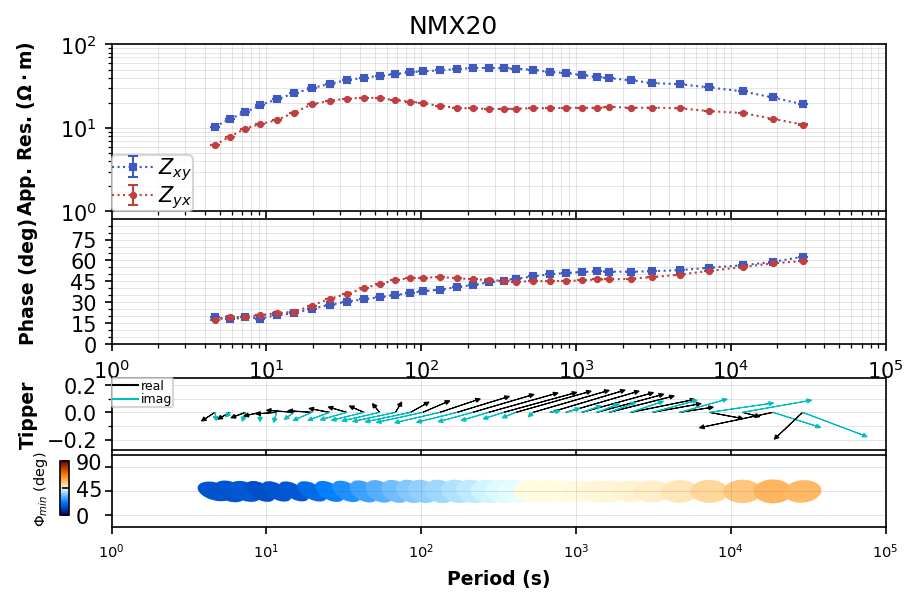

In [22]:
plot_response = mt_object.plot_mt_response()

You can plot all 4 components of the impedance tensor

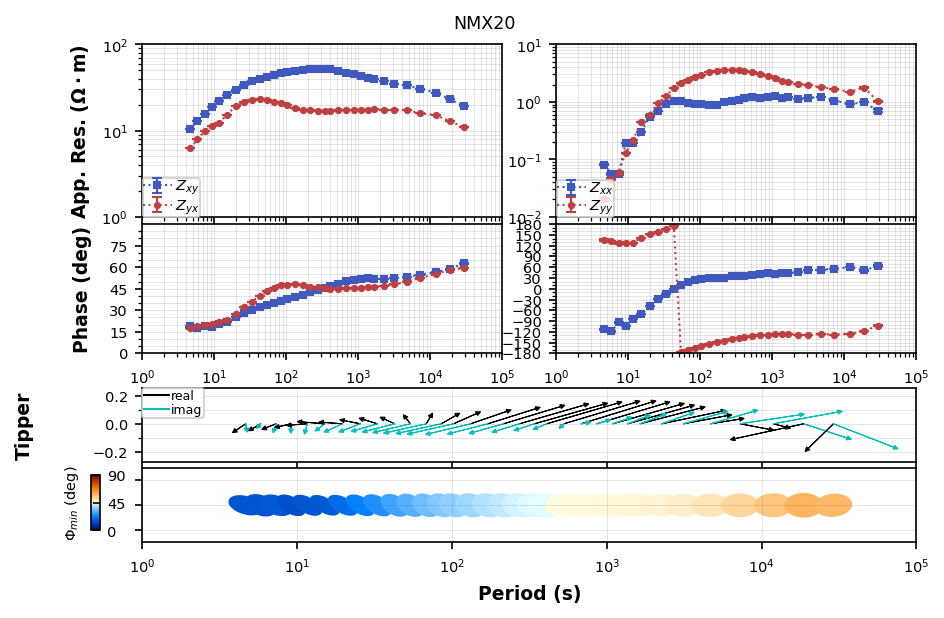

In [24]:
plot_response.plot_num = 2
plot_response.fig_num = 2
plot_response.plot()

### Plot Phase Tensor component

Sometimes it can be infomrative to plot the phase tensor components and attributes to determine dimensionality. 

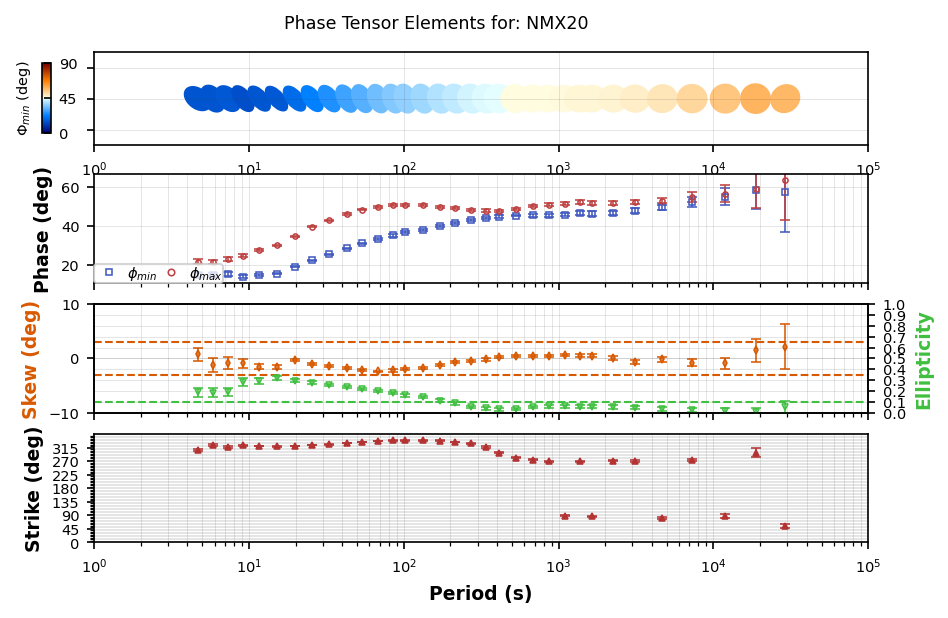

In [25]:
plot_pt = mt_object.plot_phase_tensor()

### Plot Penetration Depth

Another diagnostic of your data is to estimate the depth of penetration.  This is done through a Niblett-Bostick transformation.

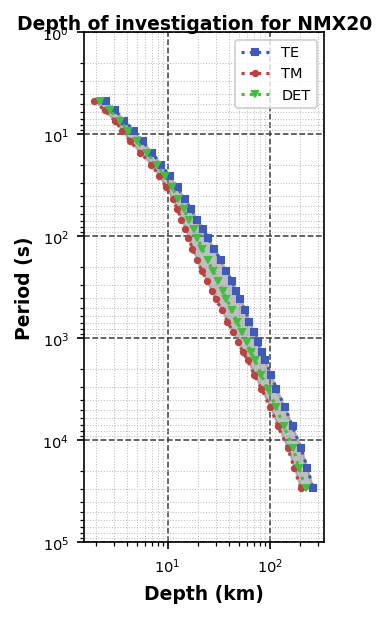

In [26]:
plot_nb = mt_object.plot_depth_of_penetration()